<a href="https://colab.research.google.com/github/AlaxanderLee/Lecture-and-self-study/blob/master/3-3%20%ED%8A%B9%EC%84%B1%20%EA%B3%B5%ED%95%99%EA%B3%BC%20%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학과 규제

## 다중 회귀(Multiple regression)

- 여러 개의 특성을 사용한 선형 회귀. (특성이 많을수록 좋은 결과값을 냄.)

- 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현함.

- 타깃 = $a$ * 특성1 + $b$ * 특성2 + 절편

## 특성 공학(Feature engineering)

- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업.

- 각 특성을 서로 곱해서 또 다른 특성을 만듦(농어 길이 * 농어 높이).

## 데이터 준비

- read_csv()

 - sep: csv 파일의 구분자를 지정함. 기본값은 콤마(,).

 - header: 데이터프레임의 열 이름으로 사용할 csv 파일의 행 번호를 지정함. 기본값은 첫 번째 열 이름.

 - skiprows: 파일에서 읽기 전에 건너뛸 행의 개수를 지정함.

 - nrows: 파일에서 읽을 행의 개수를 지정함.

In [ ]:
# 농어의 길이, 높이, 두께를 담은 데이터를 부름.
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data') # csv 파일을 읽음.
print(df) # 판다스 형식의 데이터를 출력함.

perch_full = df.to_numpy() # 넘파이 배열로 바꿈.
print(perch_full)

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
# 훈련 세트와 테스트 세트로 나눔.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

print(train_input)
print(train_target)

print(test_input)
print(test_target)

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1

## 사이킷런의 변환기

- 특성을 만들거나 전처리하기 위한 다양한 클래스

### PolynomialFeatures 클래스

- 각 특성을 제곱한 항을 추가하고, 각 특성끼리 곱한 항을 추가함.

- degree: 최고 차수를 정함. 기본값은 2.

- interaction_only: True이면 거듭제곱 항은 제외하고 특성 간 곱셈 항만 추가됨. 기본값은 False.

- include_bias: False이면 절편을 위한 특성을 추가하지 않음. 기본값은 True.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

# 새롭게 만들 특성 조합을 찾음
poly.fit([[2, 3]]) # 훈련(fit)을 반드시 해야 아래에서 변환(transform)이 가능함.

print(poly.transform([[2, 3]]))
"""
특성으로 '1', '2', '3', 2의 제곱인 '4', 3의 제곱인 '9', 2와 3을 곱한 '6'이 출력됨.
1이 추가된 이유는 선형 방정식의 '절편'이 항상 값이 '1'인 특성과 곱해지는 계수이기 때문임.
다시 말하면, 무게 = a * 길이 + b * 높이 + c * 두께 + d * 1 이므로, 특성은 (길이, 높이, 두께, 1)이 됨.
"""

# 어차피 사이킷런의 선형 모델은 절편을 자동으로 추가하므로 굳이 1을 만들 필요가 없음. 'include_bias = False'로 지정하면 1을 생략함.
poly = PolynomialFeatures(include_bias = False) # 물론 꼭 지정하지 않아도 절편 항을 자동으로 무시함.

poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

# fit과 transform을 합친 'fit_transform()' 메서드도 사용 가능함.
print(poly.fit_transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [ ]:
# train_input에 적용함.
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)

# train_poly에 변환한 값을 저장함.
train_poly = poly.transform(train_input)

print(train_poly)
print(train_poly.shape)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [ ]:
# 'get_feature_name()' 매서드를 호출하여 9개의 특성이 어떤 특성 조합으로 만들어졌는지 확인함.
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
# test_input에 적용함. 이미 train_input으로 훈련(fit)을 했기 때문에 test_input은 훈련할 필요가 없음.
test_poly = poly.transform(test_input)

print(test_poly)

[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1.114000e

## 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [ ]:
# PolynomialFeatures 클래스의 'degree' 매개변수로 고차항의 최대 차수를 지정할 수 있음. (특성을 더 추가함.)
poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly)
print(test_poly)
print(train_poly.shape)
# 특성 55개가 만들어짐.

[[1.96000000e+01 5.14000000e+00 3.04000000e+00 ... 7.42244501e+02
  4.38992857e+02 2.59637799e+02]
 [2.20000000e+01 5.88000000e+00 3.52000000e+00 ... 1.50793507e+03
  9.02709432e+02 5.40397483e+02]
 [1.87000000e+01 5.20000000e+00 3.12000000e+00 ... 8.21240709e+02
  4.92744425e+02 2.95646655e+02]
 ...
 [2.56000000e+01 6.56000000e+00 4.24000000e+00 ... 3.28023719e+03
  2.12015331e+03 1.37034299e+03]
 [4.20000000e+01 1.28000000e+01 6.87000000e+00 ... 5.31239245e+04
  2.85126063e+04 1.53032504e+04]
 [3.45000000e+01 1.02600000e+01 6.39000000e+00 ... 2.74661189e+04
  1.71060916e+04 1.06537939e+04]]
[[8.40000000e+00 2.11000000e+00 1.41000000e+00 7.05600000e+01
  1.77240000e+01 1.18440000e+01 4.45210000e+00 2.97510000e+00
  1.98810000e+00 5.92704000e+02 1.48881600e+02 9.94896000e+01
  3.73976400e+01 2.49908400e+01 1.67000400e+01 9.39393100e+00
  6.27746100e+00 4.19489100e+00 2.80322100e+00 4.97871360e+03
  1.25060544e+03 8.35712640e+02 3.14140176e+02 2.09923056e+02
  1.40280336e+02 7.89090204e

In [ ]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 특성의 개수를 늘리면 선형 모델이 매우 강력해짐. 그러나 훈련 세트에 지나치게 과대적합됨. 특성을 줄여야 함.

0.9999999999991096
-144.40579242335605


### 규제

- 훈련 세트를 과도하게 학습하지 못하도록 하는 조치. (과대적합 방지)

- 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만듦.

- 선형 회귀 모델에 규제를 적용할 때 계수가 많이 다르면 공정하게 제어되지 않음. 특성 스케일이 정규화되지 않으면 곱해지는 계수 값도 차이가 나기 때문임. 'StandardScaler' 클래스를 활용하여 정규화 해야 함.

- StandardScaler(): 평균과 표준편차를 구하여 표준점수로 변환해주는 클래스.


In [ ]:
# 'StandardScaler' 클래스를 활용하여 특성을 정규화 함. (표준점수로 변환함.)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_poly) 

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) # 반드시 훈련 세트로 학습한 변환기를 사용해서 테스트 세트까지 변환해야 함.

print(train_scaled, test_scaled)
print(train_scaled.shape, test_scaled.shape) # 55개의 평균과 표준편차를 포함함.


# StandardScaler 클래스 객체의 'mean_' 속성에는 평균, 'scale_' 속성에는 표준편차가 저장됨.
print(ss.mean_, ss.scale_)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]] [[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0

#### 릿지 회귀(Ridge regression)

- 계수를 제곱한 값을 기준으로 규제를 적용함. (계수의 크기를 줄임.)

- 일반적으로 라쏘 회귀(Lasso regression)보다 선호하며 널리 사용하는 모델.

- alpha: 규제 강도를 조절함. 기본값은 1.

  - alpha 값이 크면 규제 강도가 세짐. 계수 값을 더 줄이고 과소적합 됨.

  - alpha 값이 작으면 규제 강도가 약해짐. 계수 값을 덜 줄이고 과대적합 됨.

  - alpha 값을 변경하며 $R^2$ 그래프를 그려서, 훈련 세트 그래프와 테스트 세트 그래프가 가장 가까운 alpha 값을 적절한 alpha 값으로 취함.

- 하이퍼파라미터(hyperparameter): 사람이 직접 지정해야 하는 파라미터. alpha 매개변수의 값은 사람이 직접 지정하므로 하이퍼파라미터임.

- solver: 최적의 모델을 찾기 위한 방법을 지정함. 기본값은 auto.

  특성과 샘플이 많을 때 'saga'를 지정하여 확률적 평균 경사 하강법 알고리즘을 사용함. 성능이 빠르고 좋음.

- random_state: 'saga'일 때 넘파이 난수 시드값을 지정할 수 있음.

In [ ]:
from sklearn.linear_model import Ridge # 릿지 모델을 불러옴.

ridge = Ridge()

ridge.fit(train_scaled, train_target) # 릿지 모델을 훈련함.

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


In [ ]:
# 적절한 alpha 값을 찾기 위한 과정.
train_score = [] # 빈 칸을 만들어서 아래 for문으로 돌린 값을 저장함.
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 하이퍼파라미터를 지정함.

for alpha_value in alpha_list : # alpha_list에서 값을 하나씩 꺼내서 alpha_value에 할당함.
    
    ridge = Ridge(alpha = alpha_value) # alpha_list에서 꺼낸 값(alpha_value)을 alpha 매개변수에 할당함.
    
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target)) # 빈 칸으로 만들어 놓은 리스트에 점수를 저장함.
    test_score.append(ridge.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.9930455252088191, 0.9917809981250537, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961556662, 0.980018793687313, 0.9827976465386927, 0.9790693977615398, 0.9725329582461568, 0.9627042641050291]


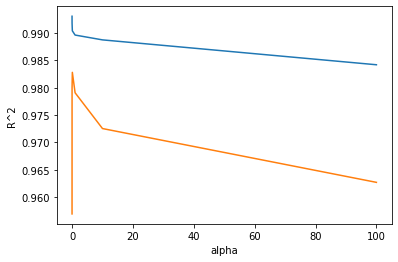

In [ ]:
# 위에서 찾은 값들을 R^2 그래프로 그림.
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score) # 파란 그래프임. alpha 값을 0.001부터 10배씩 늘렸으므로 그래프 왼쪽이 너무 촘촘함.
plt.plot(alpha_list, test_score) # 주황 그래프임.

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

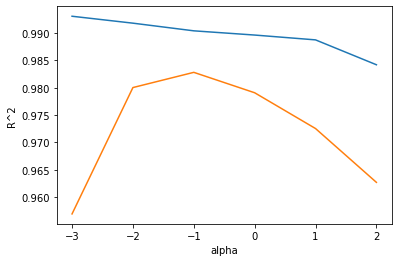

In [ ]:
plt.plot(np.log10(alpha_list), train_score) # alpha 값을 동일한 간격으로 나타내기 위해 로그 함수를 사용함. 0.001 = -3, 0.01 = -2 를 나타냄.
plt.plot(np.log10(alpha_list), test_score) # np.log(): 자연 상수 e를 밑으로 하는 자연로그, np.log10(): 10을 밑으로 하는 상용로그. 

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()
"""
-3의 경우 과대 적합, 2는 과소적합(훈련 세트와 테스트 세트 점수가 전부 낮아짐)을 나타냄.
적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 10^-1 = 0.1 임. 
"""

In [ ]:
# 최적의 하이퍼파라미터로 모델을 훈련함.
ridge = Ridge(alpha = 0.1)

ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


#### 라쏘 회귀(Lasso regression)

- 계수의 절댓값을 기준으로 규제를 적용함.

 (계수의 크기를 줄임. 0으로 만들 수도 있음. 이를 활용하여 유용한 특성을 골라내는 용도로 사용 가능함.)

- 좌표축을 따라 최적화를 수행하는 좌표 하강법(coordinate descent)을 사용함. 

- 일반적으로 릿지 회귀(Ridge regression)보다 선호하지 않는 모델.

- alpha: 규제 강도를 조절함.

  - alpha 값이 크면 규제 강도가 세짐. 계수 값을 더 줄이고 과소적합 됨.

  - alpha 값이 작으면 규제 강도가 약해짐. 계수 값을 덜 줄이고 과대적합 됨.

  - alpha 값을 변경하며 $R^2$ 그래프를 그려서, 훈련 세트 그래프와 테스트 세트 그래프가 가장 가까운 alpha 값을 적절한 alpha 값으로 취함.

- random_state: 넘파이 난수 시드값을 지정할 수 있음.

- max_iter: 알고리즘 수행 반복 횟수를 지정함. 기본값은 1000.

- coef_ 속성: 계수가 저장됨.
 
  - e.g. lasso.coef_ == 0 (계수가 0인 값을 출력함)

In [ ]:
# 릿지 모델과 같은 방식으로 진행함.
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha_value in alpha_list :

    lasso = Lasso(alpha = alpha_value, max_iter = 10000)
    """
    'ConvergenceWarning'이라는 경고가 발생함. 
    라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이 경고가 발생함. 
    반복 횟수를 늘리고자 'max_iter' 매개변수의 값을 10000으로 지정했음. 그래도 경고가 발생함.
    """

    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.9924957354689654, 0.9922988130765112, 0.9902080238600285, 0.9898116789062786, 0.9887624603020235, 0.9078618674946646]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


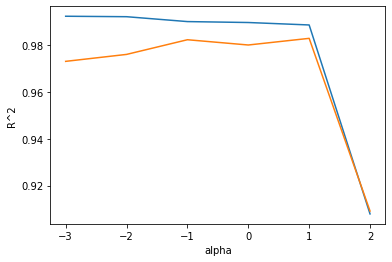

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()
"""
왼쪽은 과대적합, 오른쪽은 과소적합.
최적의 alpha 값은 1, 즉 10^1 = 10 임.
"""

In [ ]:
lasso = Lasso(alpha = 10)

lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
# lasso 모델의 계수 값은 coef_ 속성에 저장됨. 참고로 lasso 모델은 계수 값을 0으로 만들 수 있음.
print(lasso.coef_ == 0)
print(np.sum(lasso.coef_ == 0)) # True를 1로 간주함. 계수 값이 0인 합계는 40개임.
"""
라쏘 모델이 사용한 특성은 55개 중에 15개뿐임. 특성 40개를 계수 값 0으로 만들어 버렸기 때문임.
유용한 특성은 15개라는 의미로도 볼 수 있음. 즉, 라쏘 모델로 유용한 특성을 골라낼 수도 있음.
"""

[ True  True  True False False False  True  True False  True False False
 False False False  True  True False False  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True]
40
